### 数据表透视

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
ratings = pd.read_csv('../datas/movielens-1m/ratings.dat', header=None, names='uid:mid:score:timestamp'.split(':'), sep='::')
ratings.head()

,uid,mid,score,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [3]:
ratings['date'] = pd.to_datetime(ratings['timestamp'],unit='s')
ratings.head()

,uid,mid,score,timestamp,date
0,1,1193,5,978300760,2000-12-31 22:12:40
1,1,661,3,978302109,2000-12-31 22:35:09
2,1,914,3,978301968,2000-12-31 22:32:48
3,1,3408,4,978300275,2000-12-31 22:04:35
4,1,2355,5,978824291,2001-01-06 23:38:11


In [23]:
ratings_group = ratings.groupby([ratings['date'].dt.month, 'score'])['uid'].apply(np.size)
# ratings_group = ratings.groupby([ratings['date'].dt.month, 'score'])['uid'].agg(pv=np.size) # 聚合后的列名为pv

In [24]:
ratings_group.head(10)

date  score
1     1        1127
      2        2608
      3        6442
      4        8400
      5        4495
2     1         629
      2        1464
      3        3297
      4        4403
      5        2335
Name: uid, dtype: int64

In [26]:
ratings_unstack = ratings_group.unstack()

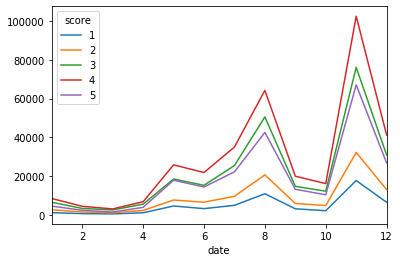

In [27]:
ratings_unstack.plot()

In [28]:
ratings_unstack

score,1,2,3,4,5
date,,,,,
1,1127,2608,6442,8400,4495
2,629,1464,3297,4403,2335
3,466,1077,2523,3032,1439
4,1048,2247,5501,6748,3863
5,4557,7631,18481,25769,17840
6,3196,6500,15211,21838,14365
7,4891,9566,25421,34957,22169
8,10873,20597,50509,64198,42497
9,3107,5873,14702,19927,13182


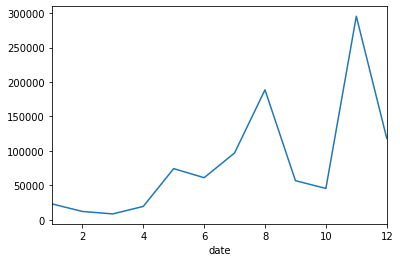

In [30]:
ratings_sum = ratings_unstack.apply(np.sum, axis=1)
ratings_sum.plot()

In [32]:
# pivot = set_multiIndex + unstack
ratings_normal = ratings_group.reset_index()
ratings_normal.head()

,date,score,uid
0,1,1,1127
1,1,2,2608
2,1,3,6442
3,1,4,8400
4,1,5,4495


In [33]:
ratings_pivot = ratings_normal.pivot(index='date',columns='score', values='uid')
ratings_pivot.head()

score,1,2,3,4,5
date,,,,,
1,1127,2608,6442,8400,4495
2,629,1464,3297,4403,2335
3,466,1077,2523,3032,1439
4,1048,2247,5501,6748,3863
5,4557,7631,18481,25769,17840


#### 总结
1. multiIndex + unstack = piovt
2. groupby -> multiIndex(groupby可以生成多级索引)
3. multiIndex -> reset_index -> piovt结果和1相同